In [1]:
import pandas as pd
import numpy as np
AD = pd.read_csv("housing.csv")
print("First 5 Rows of Our actual data:")
AD.head()

First 5 Rows of Our actual data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
print ("Columns and Missing Values:")
AD.info()

Columns and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
print("Categorical Columns:")
AD["median_income"].value_counts()

Categorical Columns:


median_income
3.1250     49
15.0001    49
2.8750     46
4.1250     44
2.6250     44
           ..
5.6790      1
2.5478      1
1.9559      1
3.7574      1
1.4946      1
Name: count, Length: 12928, dtype: int64

In [4]:
print("Statical Data:")
AD.describe()


Statical Data:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Histogram of all Colums:


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

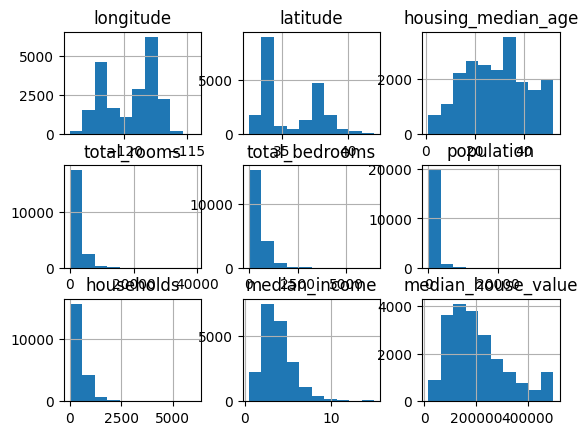

In [5]:
print("Histogram of all Colums:")
AD.hist()

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(AD,test_size = 0.2,random_state = 42)
#This is a good way But in this case our data is too important data So thats why we use startified sampling

In [7]:
print("For using Statified Sampling, First we make new columns")
AD["NEWCOLUMN"] = pd.cut(AD["median_income"],
                        bins = [0,1.5,3,4.5,5,np.inf],
                        labels = [1,2,3,4,5])
print("Maked Sucessfully:")
AD.info()

For using Statified Sampling, First we make new columns
Maked Sucessfully:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  NEWCOLUMN           20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


Visualize it:


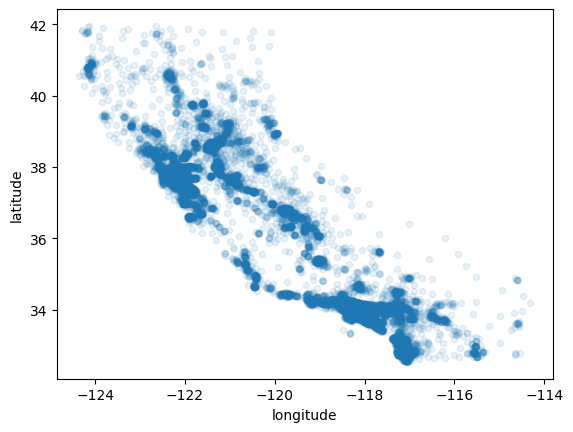

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

# Stratified Shuffle Split based on NEWCOLUMN
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_i, test_i in split.split(AD, AD["NEWCOLUMN"]):
    stratifiedshuffle_train_set = AD.loc[train_i]
    stratifiedshuffle_test_set = AD.loc[test_i]

# Now we don't need NEWCOLUMN
for dataset in (stratifiedshuffle_train_set, stratifiedshuffle_test_set):
    dataset.drop("NEWCOLUMN", axis=1, inplace=True)

# Visualize the original data distribution
print("Visualize it:")
AD.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.show()


ADD SIZE AND COLOUR (HEATMAP)


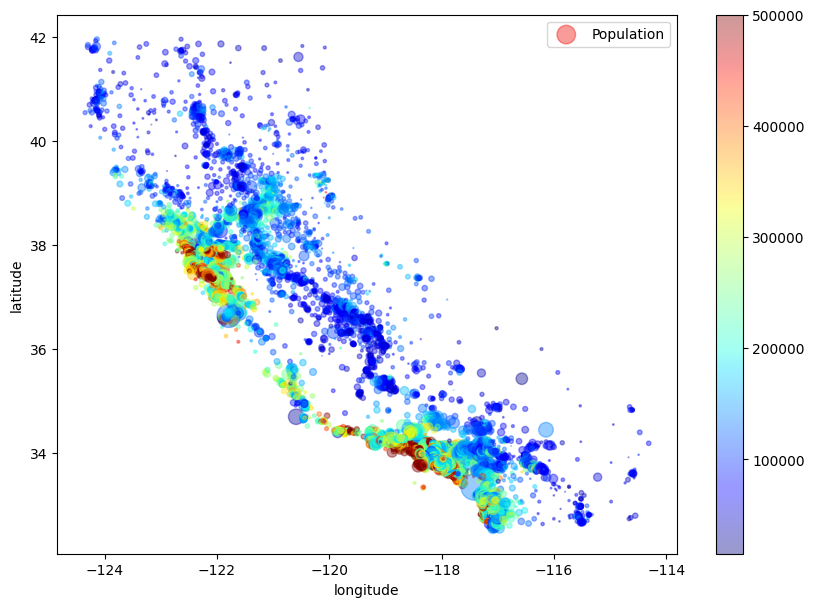

In [9]:
print("ADD SIZE AND COLOUR (HEATMAP)")
AD.plot(kind="scatter", 
        x="longitude", 
        y="latitude", 
        alpha=0.4,
        s=AD["population"] / 100,              # size of points
        label="Population", 
        c=AD["median_house_value"],            # color of points
        cmap="jet", 
        colorbar=True, 
        figsize=(10, 7))
plt.legend()
plt.show()


In [10]:
convert = AD.select_dtypes(include=["float64", "int64"])
correlation = convert.corr()
print('median_house_value most closest with median_income:')
print("AS WE SEE:")
print(correlation["median_house_value"].sort_values(ascending=False))

median_house_value most closest with median_income:
AS WE SEE:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


Let's make the Scatter plot


<Axes: xlabel='median_income', ylabel='median_house_value'>

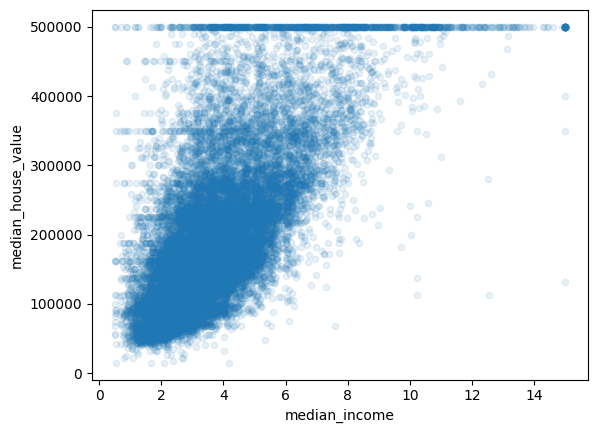

In [11]:
# Remove any leading/trailing spaces from column names
AD.columns = AD.columns.str.strip()
# Now plot safely
print("Let's make the Scatter plot")
AD.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)


In [12]:
print("Let's apply Feature Engineering:")
# Create new columns based on existing ones
AD["COL1"] = AD["total_rooms"] / AD["households"]         # rooms per household
AD["COL2"] = AD["total_bedrooms"] / AD["total_rooms"]     # bedrooms per room
AD["COL3"] = AD["population"] / AD["households"]          # people per household
print("Check Correlation Again:")
# Keep only numeric columns for correlation
correlation2 = AD.select_dtypes(include=["float64", "int64"]).corr()
# Print correlation with target variable
print(correlation2["median_house_value"].sort_values(ascending=False))


Let's apply Feature Engineering:
Check Correlation Again:
median_house_value    1.000000
median_income         0.688075
COL1                  0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
COL3                 -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
COL2                 -0.255880
Name: median_house_value, dtype: float64


In [13]:
print("Prepare data for ML Algorithm:")

# Step 1: Separate features and label
AD = stratifiedshuffle_train_set.drop("median_house_value", axis=1)
AD_labels = stratifiedshuffle_train_set["median_house_value"].copy()

# Step 2: Fix missing values using median strategy
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

# Drop the non-numeric column before imputation
AD_num = AD.drop("ocean_proximity", axis=1)  #  double-check the spelling

# Fit and transform the imputer
imputer.fit(AD_num)
Fixed = imputer.transform(AD_num)

# Optional: Convert back to DataFrame with original column names
import pandas as pd
AD_fixed = pd.DataFrame(Fixed, columns=AD_num.columns, index=AD.index)

print("Missing values fixed. Your data is ready for further processing.")


Prepare data for ML Algorithm:
Missing values fixed. Your data is ready for further processing.


In [14]:
print("Convert categorical column into numeric (OneHotEncoding)")
from sklearn.preprocessing import OneHotEncoder
# Select the categorical column
AD_Cat = AD[["ocean_proximity"]]  # Double brackets = keep it as a DataFrame
# Create and fit the OneHotEncoder
Cat_Encoder = OneHotEncoder()
AD_Cat_1hot = Cat_Encoder.fit_transform(AD_Cat)

Convert categorical column into numeric (OneHotEncoding)


In [15]:
print("Make a pipeline for numerical features")
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
# Create pipeline
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")), #FIll blank
    ("std_scaler", StandardScaler()) #Scale Values
])

Make a pipeline for numerical features


In [16]:
print("Combine Numbers and Text Together")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#variable names
num_attributes = list(AD_num.columns)  
cat_attributes = ["ocean_proximity"]
# Combine numeric and categorical pipelines
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(), cat_attributes)
])


Combine Numbers and Text Together


In [17]:
print ("Run the Final Machine")
AD_prepared = full_pipeline.fit_transform(AD)

Run the Final Machine


In [18]:
print ("Select the model")
from sklearn.linear_model import LinearRegression
Model =  LinearRegression()
Model.fit (AD_prepared,AD_labels)


Select the model


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
print("Test Model on Some Data (First 5 rows)")
some_data = AD.iloc[:5]
some_labels = AD_labels.iloc[:5]
some_prepared = full_pipeline.transform(some_data)

Test Model on Some Data (First 5 rows)


In [20]:
print("Let's see how close our model guesses using RMSE")
from sklearn.metrics import mean_squared_error
# Predict on the prepared training data
AD_predict = Model.predict(AD_prepared)
# Calculate RMSE
lin_mse = mean_squared_error(AD_labels, AD_predict)
lin_rmse = lin_mse ** 0.5
print("RMSE on training data:", lin_rmse)

Let's see how close our model guesses using RMSE
RMSE on training data: 69056.85754719554


In [21]:
print("RMSE on training data: 69056.85754719554")
print("This is not good. Let's use a better model.")
print("Decision Tree Regressor")
print("Train a Decision Tree Regressor")
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import mean_squared_error  
import numpy as np                               
MODEL2 = DecisionTreeRegressor()
MODEL2.fit(AD_prepared, AD_labels)
AD_predictions = MODEL2.predict(AD_prepared)     
tree_mse = mean_squared_error(AD_labels, AD_predictions)
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE on training data:", tree_rmse)


RMSE on training data: 69056.85754719554
This is not good. Let's use a better model.
Decision Tree Regressor
Train a Decision Tree Regressor
Decision Tree RMSE on training data: 0.0


In [22]:
print("Better Evaluation Using Cross-Validation")
from sklearn.model_selection import cross_val_score
import numpy as np
# Use 10-fold cross-validation
scores = cross_val_score(MODEL2, AD_prepared, AD_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)


Better Evaluation Using Cross-Validation
Scores: [73314.90072427 64674.41921096 65635.20755864 71480.92260423
 68981.38581896 70432.00408418 72040.38433384 64557.93539856
 69595.04467918 70821.27610689]
Mean: 69153.34805197052
Standard deviation: 2987.785938574727


In [23]:
print ("Decision Tree is overfitting.")
from sklearn.ensemble import RandomForestRegressor
# Create the model
MODEL3 = RandomForestRegressor()
# Train the model on the prepared data
MODEL3.fit(AD_prepared, AD_labels)
# Predict on training data
AD_predict = MODEL3.predict(AD_prepared)
# Calculate RMSE
from sklearn.metrics import mean_squared_error
forest_mse = mean_squared_error(AD_labels, AD_predict)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest RMSE on training data:", forest_rmse)
from sklearn.model_selection import cross_val_score
import numpy as np
# Perform 10-fold cross-validation
forest_scores = cross_val_score(MODEL3, AD_prepared, AD_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(forest_rmse_scores)



Decision Tree is overfitting.
Random Forest RMSE on training data: 18396.33618794749
Scores: [51925.04859476 46067.03173563 48243.5490415  51743.34246818
 47508.21049629 49449.97746745 50888.39988503 45319.38225779
 49469.61448483 52911.47572626]
Mean: 49352.60321577246
Standard deviation: 2430.5177360029725


In [24]:
print ("Fine-Tune the Model using GridSearchCV")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
    {"n_estimators": [30, 50, 100], "max_features": [4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [30, 50], "max_features": [4, 6]},
]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(AD_prepared, AD_labels)
print("Best parameters:", grid_search.best_params_)
print("Best score (RMSE):", np.sqrt(-grid_search.best_score_))


Fine-Tune the Model using GridSearchCV
Best parameters: {'max_features': 8, 'n_estimators': 100}
Best score (RMSE): 49417.339473793996


In [25]:
print (" Check All Evaluation Scores")
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)


 Check All Evaluation Scores
50955.43123098506 {'max_features': 4, 'n_estimators': 30}
50275.82757380453 {'max_features': 4, 'n_estimators': 50}
49992.97321601541 {'max_features': 4, 'n_estimators': 100}
50179.10578157441 {'max_features': 6, 'n_estimators': 30}
49738.31266233364 {'max_features': 6, 'n_estimators': 50}
49563.90011469832 {'max_features': 6, 'n_estimators': 100}
50219.6035995074 {'max_features': 8, 'n_estimators': 30}
49768.28791427701 {'max_features': 8, 'n_estimators': 50}
49417.339473793996 {'max_features': 8, 'n_estimators': 100}
50097.899626667604 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
49532.68864409979 {'bootstrap': False, 'max_features': 4, 'n_estimators': 50}
49783.80991896485 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
49477.11440403682 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}


In [26]:
print ("Analyze Feature Importance")
feature_importances = grid_search.best_estimator_.feature_importances_

# Add your extra engineered features if any
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]

# Get list of all attributes (numerical + one-hot encoded categories)
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs

# Print feature importances
sorted(zip(feature_importances, attributes), reverse=True)


Analyze Feature Importance


[(np.float64(0.44481941772051614), 'median_income'),
 (np.float64(0.1490846229162667), 'pop_per_hhold'),
 (np.float64(0.11008749205982618), 'longitude'),
 (np.float64(0.10216862104356404), 'latitude'),
 (np.float64(0.04893410712045235), 'housing_median_age'),
 (np.float64(0.03845479995332516), 'population'),
 (np.float64(0.03131212582056818), 'total_rooms'),
 (np.float64(0.02701219687289142), 'total_bedrooms'),
 (np.float64(0.025700213506938244), 'households'),
 (np.float64(0.013609852443661044), 'rooms_per_hhold'),
 (np.float64(0.006208896737019492), 'INLAND'),
 (np.float64(0.002549935326880732), '<1H OCEAN'),
 (np.float64(5.771847809015161e-05), 'bedrooms_per_room')]

In [28]:
print("Evaluate the Final Model on the Test Set")
final_model = grid_search.best_estimator_

X_test = stratifiedshuffle_test_set.drop("median_house_value", axis=1)
y_test = stratifiedshuffle_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("Final RMSE on test set:", final_rmse)


Evaluate the Final Model on the Test Set
Final RMSE on test set: 46771.013958444666


In [29]:
print ("Compute 95% Confidence Interval for RMSE")
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
interval = np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                                    loc=squared_errors.mean(),
                                    scale=stats.sem(squared_errors)))
print("95% confidence interval for RMSE:", interval)


Compute 95% Confidence Interval for RMSE
95% confidence interval for RMSE: [44834.22179376 48630.73153418]


In [30]:
print("Save the Model using joblib")
import joblib
# Save the best model
joblib.dump(final_model, "best_model.pkl")


Save the Model using joblib


['best_model.pkl']

In [31]:
print (" Load the Model Later")
# Load the model
final_model = joblib.load("best_model.pkl")


 Load the Model Later


Phase 2: Project Report
1. Project Overview
We worked on a housing price prediction project.
We used the California housing dataset.
The main goal was to predict the median house value.

2. Data Preparation

We fixed missing values using SimpleImputer with the median.

We handled text data using OneHotEncoder.

We combined all features using ColumnTransformer.

We scaled the data using StandardScaler.

3. Feature Engineering
We added new features to improve model performance:

rooms_per_household = total_rooms / households

population_per_household = population / households

bedrooms_per_room = total_bedrooms / total_rooms

4. Modeling
We trained three models:

Linear Regression

Decision Tree

Random Forest (this gave the best results)



In [32]:
print("Final Evaluation")
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

# Predict
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# Confidence interval
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
interval = np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                                    loc=squared_errors.mean(),
                                    scale=stats.sem(squared_errors)))

print("Final RMSE:", final_rmse)
print("95% Confidence Interval:", interval)


Final Evaluation
Final RMSE: 46771.013958444666
95% Confidence Interval: [44834.22179376 48630.73153418]


In [33]:
print (" Visualize Feature Importance")
feature_importances = final_model.feature_importances_

# Recover feature names
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs

# Display sorted importances
sorted(zip(feature_importances, attributes), reverse=True)


 Visualize Feature Importance


[(np.float64(0.44481941772051614), 'median_income'),
 (np.float64(0.1490846229162667), 'pop_per_hhold'),
 (np.float64(0.11008749205982618), 'longitude'),
 (np.float64(0.10216862104356404), 'latitude'),
 (np.float64(0.04893410712045235), 'housing_median_age'),
 (np.float64(0.03845479995332516), 'population'),
 (np.float64(0.03131212582056818), 'total_rooms'),
 (np.float64(0.02701219687289142), 'total_bedrooms'),
 (np.float64(0.025700213506938244), 'households'),
 (np.float64(0.013609852443661044), 'rooms_per_hhold'),
 (np.float64(0.006208896737019492), 'INLAND'),
 (np.float64(0.002549935326880732), '<1H OCEAN'),
 (np.float64(5.771847809015161e-05), 'bedrooms_per_room')]